# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [129]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns


## Cargar datos

In [130]:
# Carga los archivos de datos en diferentes DataFrames
df_users= pd.read_csv('C:/Users/lilia/Downloads/megaline_users.csv')
df_calls= pd.read_csv('C:/Users/lilia/Downloads/megaline_calls.csv')
df_messages= pd.read_csv('C:/Users/lilia/Downloads/megaline_messages.csv') 
df_internet= pd.read_csv('C:/Users/lilia/Downloads/megaline_internet.csv')
df_plans= pd.read_csv('C:/Users/lilia/Downloads/megaline_plans.csv')



## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [131]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [132]:
# Imprime una muestra de los datos para las tarifas
display(df_plans.head())



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


***Revisando la muestra se logra identificar que la columna mb_per_month_included esta dada en megabytes, asi que hay que trasnformarlos a gb, ademas se le cambiara el nombre a la columna de mb_per a gb_per.***
[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [133]:
df_plans['mb_per_month_included'] = df_plans['mb_per_month_included']/1024
display(df_plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [134]:
df_plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)
df_plans.rename(columns={'usd_monthly_pay':'usd_monthly_fee'}, inplace=True)
display(df_plans)

,messages_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

In [135]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()
print(df_users['user_id'].duplicated().sum())
print(df_users.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
0
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [136]:
# Imprime una muestra de datos para usuarios
display(df_users.head())



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


**Se logra apreciar que en la columna *churn_date* existen valores nulos ya que son clientes que aun estan activos con su linea y por eso no tienen fecha de finalizacion de servicio, lo conveniente seria renombrar los datos de esta columna**
[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [137]:
df_users['churn_date'].fillna(value='activa', inplace=True)
print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate     activa  
1  2018-08-13      surf     activa  
2  2018-10-21      surf     activa  
3  2018-01-28      surf     activa  
4  2018-05-23      surf     activa  


C:\Users\lilia\AppData\Local\Temp\ipykernel_5424\3153818754.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_users['churn_date'].fillna(value='activa', inplace=True)


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [138]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'],format='%Y-%m-%d')
df_users['month']= df_users['reg_date'].dt.month
df_users.rename(columns={'plan': 'plan_name'}, inplace=True)
display(df_users.head())

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,activa,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activa,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,activa,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,activa,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,activa,5


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

## Llamadas

In [139]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()
print()
print('Total de filas duplicadas:', df_calls.duplicated().sum())
print()
print('Datos ausentes encontrados:')
print(df_calls.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

Total de filas duplicadas: 0

Datos ausentes encontrados:
id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [140]:
# Imprime una muestra de datos para las llamadas
df_calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


**No se encontro ningun problema con el data frame de calls.**

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [141]:
df_calls['duration']= np.ceil(df_calls['duration'])
display(df_calls)
    

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [142]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['month']= df_calls['call_date'].dt.month
calls_per_user_per_month= df_calls.groupby(['user_id', 'month']).size().reset_index(name='num_calls')
display(df_users.head())
display(calls_per_user_per_month)

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,activa,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activa,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,activa,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,activa,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,activa,5


,user_id,month,num_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


**Se cuenta con 26834 llamadas con duracion cero**

## Mensajes

In [143]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()
print()
print('Total de filas duplicadas:', df_messages.duplicated().sum())
print()
print('Datos ausentes encontrados:')
print(df_messages.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

Total de filas duplicadas: 0

Datos ausentes encontrados:
id              0
user_id         0
message_date    0
dtype: int64


In [144]:
# Imprime una muestra de datos para los mensajes
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**No se percibe ningun error en el data frame de message.**

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [145]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'],format= '%Y-%m-%d')
df_messages['month']= df_messages['message_date'].dt.month
display(df_messages.head())

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [146]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()
print()
print('Total de filas duplicadas:', df_internet.duplicated().sum())
print()
print('Datos ausentes encontrados:')
print(df_internet.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

Total de filas duplicadas: 0

Datos ausentes encontrados:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [147]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**No se encuentra ningun problema con el data frame de internet, en la columna mb_used existen lineas con 0 megas consumidos, pero al no ser datos duplicados se dejaran asi.**

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [148]:
df_internet.rename(columns={'mb_used':'gb_used'}, inplace= True)
df_internet['gb_used']= df_internet['gb_used']/1024
display(df_internet.head())

,id,user_id,session_date,gb_used
0,1000_13,1000,2018-12-29,0.087754
1,1000_204,1000,2018-12-31,0.000000
2,1000_379,1000,2018-12-28,0.644922
3,1000_413,1000,2018-12-26,0.264639
4,1000_442,1000,2018-12-27,0.859590


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [149]:
df_internet['session_date']= pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')
df_internet['month']= df_internet['session_date'].dt.month
display(df_internet.head())

,id,user_id,session_date,gb_used,month
0,1000_13,1000,2018-12-29,0.087754,12
1,1000_204,1000,2018-12-31,0.000000,12
2,1000_379,1000,2018-12-28,0.644922,12
3,1000_413,1000,2018-12-26,0.264639,12
4,1000_442,1000,2018-12-27,0.859590,12


***Se cambio a gb la columna y se redondeo***

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [150]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()



,messages_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [151]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
pivot_calls = df_calls.pivot_table(index=['user_id', 'month'],
                            values=['duration'],
                            aggfunc=['count']).reset_index()
display(pivot_calls)

,user_id,month,count
,,,duration
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53


***Listo, se cambio codigo para usar pivot_table***

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [152]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
pivot_minutes= df_calls.pivot_table(index=['user_id','month'],
                                   values=['duration'],
                                   aggfunc=['sum']).reset_index()
display(pivot_minutes)


,user_id,month,sum
,,,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0


In [153]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user_per_moth= df_messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')
display(messages_per_user_per_moth.head())


,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [154]:
display(df_internet.head(2))

,id,user_id,session_date,gb_used,month
0,1000_13,1000,2018-12-29,0.087754,12
1,1000_204,1000,2018-12-31,0.000000,12


In [155]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
traffic_per_user_per_month= df_internet.groupby(['user_id','month'])['gb_used'].sum().reset_index(name='total_traficc_gb')
display(traffic_per_user_per_month.head(3))

# Se redondea el total del mes hacia arriba eje. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.
traffic_per_user_per_month['total_traficc_gb']=np.ceil(traffic_per_user_per_month['total_traficc_gb'])
display(traffic_per_user_per_month.head(3))
df_internet=traffic_per_user_per_month

#REVISAR CODIGO A PARTIR DE AQUI DIFERENCIAS



,user_id,month,total_traficc_gb
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754


,user_id,month,total_traficc_gb
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [156]:
display(df_internet)

,user_id,month,total_traficc_gb
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


In [157]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_grouped = df_calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
messages_grouped = df_messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages_grouped = messages_grouped.rename(columns={'id': 'message_count'})
internet_grouped = df_internet.groupby(['user_id', 'month']).agg({'total_traficc_gb': 'sum'}).reset_index()
merged_data = pd.merge(calls_grouped, messages_grouped, how='outer', on=['user_id', 'month'])
merged_data = pd.merge(merged_data, internet_grouped, how='outer', on=['user_id', 'month'])
merged_data = pd.merge(merged_data,calls_per_user_per_month, how='outer', on=['user_id','month'])
merged_data = merged_data.fillna(0)
display(merged_data.head())

,user_id,month,duration,message_count,total_traficc_gb,num_calls
0,1000,12,124.0,11.0,2.0,16.0
1,1001,8,182.0,30.0,7.0,27.0
2,1001,9,315.0,44.0,14.0,49.0
3,1001,10,393.0,53.0,22.0,65.0
4,1001,11,426.0,36.0,19.0,64.0


In [158]:
# Añade la información de la tarifa
merged_data_with_user = merged_data.merge(df_users[['user_id', 'plan_name']], on='user_id', how='left')
merged_data_with_tariff = merged_data_with_user.merge(df_plans, left_on='plan_name', right_on='plan_name', how='left')
merged_data_with_tariff = merged_data_with_tariff.fillna(0)
display(merged_data_with_tariff.head())


,user_id,month,duration,message_count,total_traficc_gb,num_calls,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,124.0,11.0,2.0,16.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
1,1001,8,182.0,30.0,7.0,27.0,surf,50,15.0,500,20,10,0.03,0.03
2,1001,9,315.0,44.0,14.0,49.0,surf,50,15.0,500,20,10,0.03,0.03
3,1001,10,393.0,53.0,22.0,65.0,surf,50,15.0,500,20,10,0.03,0.03
4,1001,11,426.0,36.0,19.0,64.0,surf,50,15.0,500,20,10,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [159]:
# Calcula el ingreso mensual para cada usuario
merged_data_with_tariff['excess_minutes'] = np.maximum(merged_data_with_tariff['duration'] - merged_data_with_tariff['minutes_included'],0)
merged_data_with_tariff['excess_messages'] = np.maximum(merged_data_with_tariff['message_count'] - merged_data_with_tariff['messages_included'],0)
merged_data_with_tariff['excess_data_gb'] = np.maximum((merged_data_with_tariff['total_traficc_gb'] - merged_data_with_tariff['gb_per_month_included']),0)  # Convertir MB a GB

merged_data_with_tariff['minutes_revenue'] = merged_data_with_tariff['excess_minutes'] * merged_data_with_tariff['usd_per_minute']
merged_data_with_tariff['messages_revenue'] = merged_data_with_tariff['excess_messages'] * merged_data_with_tariff['usd_per_message']
merged_data_with_tariff['data_revenue'] = merged_data_with_tariff['excess_data_gb'] * merged_data_with_tariff['usd_per_gb']

merged_data_with_tariff['total_revenue'] = (merged_data_with_tariff['usd_monthly_fee'] +
                                            merged_data_with_tariff['minutes_revenue'] +
                                            merged_data_with_tariff['messages_revenue'] +
                                            merged_data_with_tariff['data_revenue'])
display(merged_data_with_tariff.head())




,user_id,month,duration,message_count,total_traficc_gb,num_calls,plan_name,messages_included,gb_per_month_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,excess_minutes,excess_messages,excess_data_gb,minutes_revenue,messages_revenue,data_revenue,total_revenue
0,1000,12,124.0,11.0,2.0,16.0,ultimate,1000,30.0,3000,...,7,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1,1001,8,182.0,30.0,7.0,27.0,surf,50,15.0,500,...,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
2,1001,9,315.0,44.0,14.0,49.0,surf,50,15.0,500,...,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
3,1001,10,393.0,53.0,22.0,65.0,surf,50,15.0,500,...,10,0.03,0.03,0.0,3.0,7.0,0.0,0.09,70.0,90.09
4,1001,11,426.0,36.0,19.0,64.0,surf,50,15.0,500,...,10,0.03,0.03,0.0,0.0,4.0,0.0,0.00,40.0,60.00


***Listo se redondeo la duración de las llamadas***

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Por otro lado, recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y la transformación de megabytes a gigabytes. 
</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

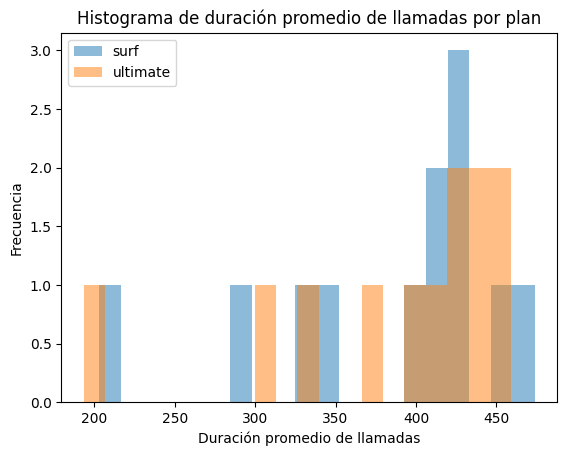

In [160]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
average_duration = merged_data_with_tariff.groupby(['plan_name', 'month'])['duration'].mean().reset_index()


# Trazar el gráfico de barras
for plan, data in average_duration.groupby('plan_name'):
    plt.hist(data['duration'], bins=20, alpha=0.5, label=plan)

plt.xlabel('Duración promedio de llamadas')
plt.ylabel('Frecuencia')
plt.title('Histograma de duración promedio de llamadas por plan')
plt.legend()
plt.show()


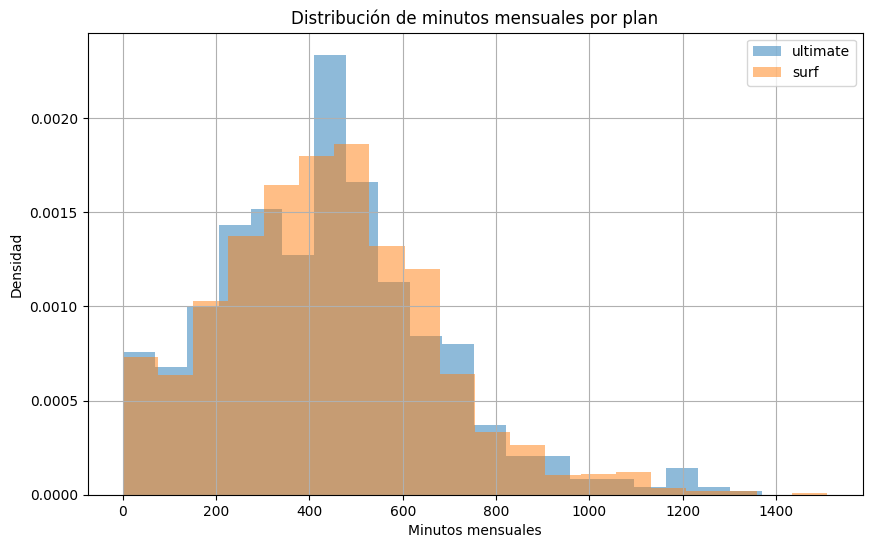

In [161]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
merged_data = df_calls.merge(df_users[['user_id', 'plan_name']], on='user_id', how='left')
merged_data['call_date'] = pd.to_datetime(merged_data['call_date'])
merged_data['month'] = merged_data['call_date'].dt.month
monthly_minutes = merged_data.groupby(['user_id', 'plan_name', 'month'])['duration'].sum().reset_index()
plt.figure(figsize=(10, 6))
for plan in monthly_minutes['plan_name'].unique():
    data = monthly_minutes[monthly_minutes['plan_name'] == plan]
    plt.hist(data['duration'], bins=20, alpha=0.5, label=plan, density=True)

plt.xlabel('Minutos mensuales')
plt.ylabel('Densidad')
plt.title('Distribución de minutos mensuales por plan')
plt.legend()
plt.grid(True)
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [162]:
#Borrar este codigo al final
display(merged_data_with_tariff.head(4))


,user_id,month,duration,message_count,total_traficc_gb,num_calls,plan_name,messages_included,gb_per_month_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,excess_minutes,excess_messages,excess_data_gb,minutes_revenue,messages_revenue,data_revenue,total_revenue
0,1000,12,124.0,11.0,2.0,16.0,ultimate,1000,30.0,3000,...,7,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1,1001,8,182.0,30.0,7.0,27.0,surf,50,15.0,500,...,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
2,1001,9,315.0,44.0,14.0,49.0,surf,50,15.0,500,...,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
3,1001,10,393.0,53.0,22.0,65.0,surf,50,15.0,500,...,10,0.03,0.03,0.0,3.0,7.0,0.0,0.09,70.0,90.09


In [163]:
# Calcula la media y la varianza de la duración mensual de llamadas.
merged_data_with_tariff = pd.merge(merged_data_with_tariff, df_calls[['user_id', 'call_date']], on='user_id', how='left')
merged_data_with_tariff['call_date']=pd.to_datetime(merged_data_with_tariff['call_date'])
merged_data_with_tariff['month']= merged_data_with_tariff['call_date'].dt.month
duration_per_month=merged_data_with_tariff.groupby('month')['duration'].sum()                                                          

mean_duration=duration_per_month.mean()
variance_duration=duration_per_month.var()

print('Duracion mensual promedio de las llamadas:', mean_duration)
print('Varianza de la duracion mensual de las llamadas:', variance_duration)



Duracion mensual promedio de las llamadas: 39712153.666666664
Varianza de la duracion mensual de las llamadas: 744686110507978.9


In [164]:
#Borrar codigo
display(merged_data_with_tariff.head(2))

,user_id,month,duration,message_count,total_traficc_gb,num_calls,plan_name,messages_included,gb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,excess_minutes,excess_messages,excess_data_gb,minutes_revenue,messages_revenue,data_revenue,total_revenue,call_date
0,1000,12.0,124.0,11.0,2.0,16.0,ultimate,1000,30.0,3000,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,70.0,2018-12-27
1,1000,12.0,124.0,11.0,2.0,16.0,ultimate,1000,30.0,3000,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,70.0,2018-12-27


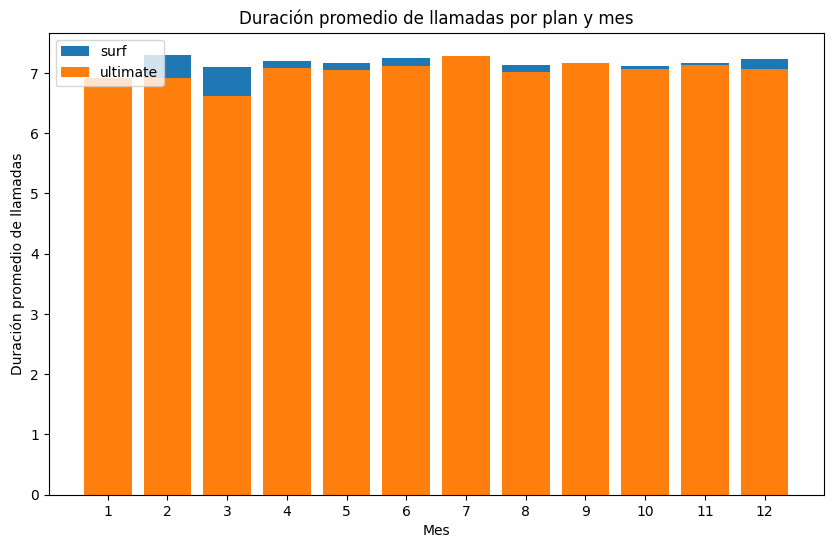

In [167]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
merged_data = df_calls.merge(df_users[['user_id', 'plan_name']], on='user_id', how='left')
merged_data['call_date'] = pd.to_datetime(merged_data['call_date'])
merged_data['month'] = merged_data['call_date'].dt.month
average_duration = merged_data.groupby(['plan_name', 'month'])['duration'].mean().reset_index()
plt.figure(figsize=(10, 6))
for plan in average_duration['plan_name'].unique():
    data = average_duration[average_duration['plan_name'] == plan]
    plt.bar(data['month'], data['duration'], label=plan)

plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas')
plt.title('Duración promedio de llamadas por plan y mes')
plt.xticks(range(1, 13))  # Establecemos los meses en el eje x
alpha=0.9
plt.legend()
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

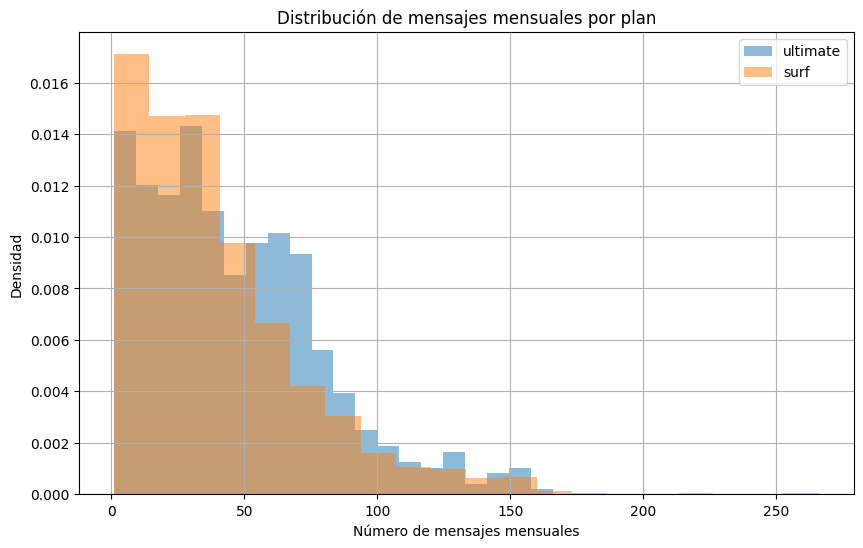

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
merged_messages = df_messages.merge(df_users[['user_id', 'plan_name']], on='user_id', how='left')
merged_messages['message_date'] = pd.to_datetime(merged_messages['message_date'])
merged_messages['month'] = merged_messages['message_date'].dt.month
monthly_messages = merged_messages.groupby(['user_id', 'plan_name', 'month'])['id'].count().reset_index()
plt.figure(figsize=(10, 6))
for plan in monthly_messages['plan_name'].unique():
    data = monthly_messages[monthly_messages['plan_name'] == plan]
    plt.hist(data['id'], bins=20, alpha=0.5, label=plan, density=True)
plt.xlabel('Número de mensajes mensuales')
plt.ylabel('Densidad')
plt.title('Distribución de mensajes mensuales por plan')
plt.legend()
plt.grid(True)
plt.show()


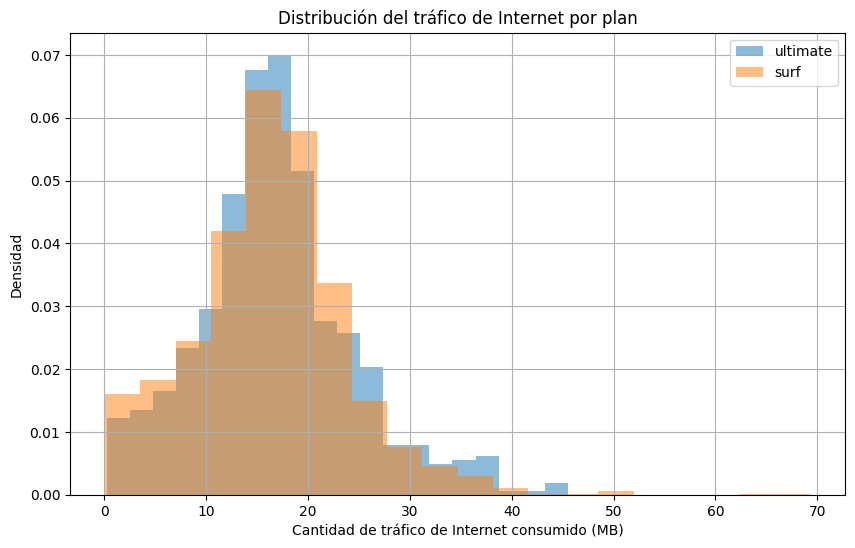

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
merged_internet = df_internet.merge(df_users[['user_id', 'plan_name']], on='user_id', how='left')
merged_internet['session_date'] = pd.to_datetime(merged_internet['session_date'])
merged_internet['month'] = merged_internet['session_date'].dt.month
monthly_traffic = merged_internet.groupby(['user_id', 'plan_name', 'month'])['gb_used'].sum().reset_index()
plt.figure(figsize=(10, 6))
for plan in monthly_traffic['plan_name'].unique():
    data = monthly_traffic[monthly_traffic['plan_name'] == plan]
    plt.hist(data['gb_used'], bins=20, alpha=0.5, label=plan, density=True)
    
plt.xlabel('Cantidad de tráfico de Internet consumido (MB)')
plt.ylabel('Densidad')
plt.title('Distribución del tráfico de Internet por plan')
plt.legend()
plt.grid(True)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

### Internet

In [ ]:
data_used_per_month=merged_data_with_tariff.groupby('month')['gb_used'].sum()
display(data_used_per_month)

month
1       36.545010
2      224.132080
3      514.456387
4      915.786035
5     1518.759102
6     2153.447871
7     2924.956631
8     3892.274229
9     4568.502393
10    5829.801826
11    6628.210000
12    8332.936748
Name: gb_used, dtype: float64

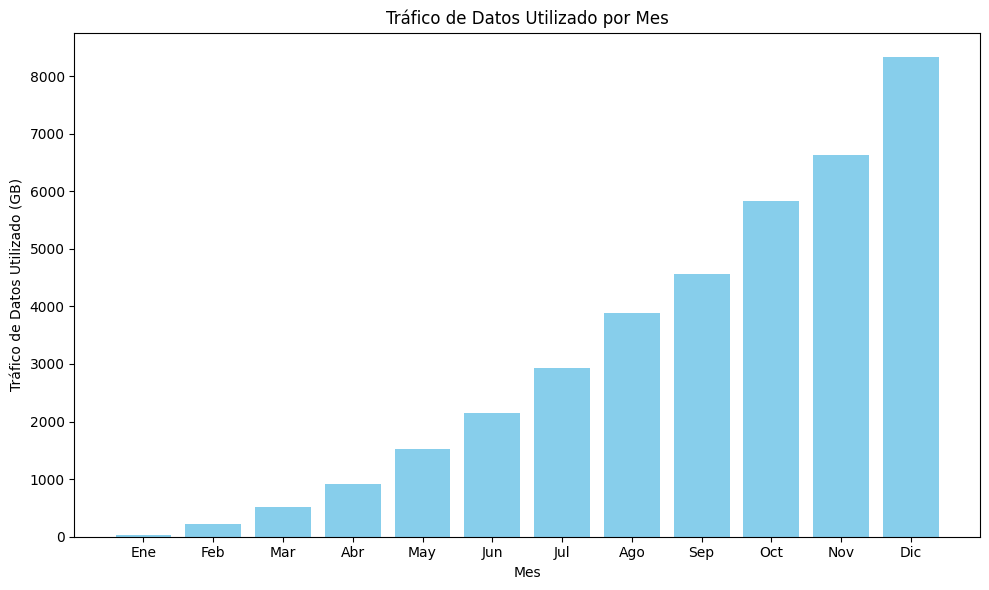

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(data_used_per_month.index, data_used_per_month.values, color='skyblue')
plt.title('Tráfico de Datos Utilizado por Mes')
plt.xlabel('Mes')
plt.ylabel('Tráfico de Datos Utilizado (GB)')
plt.xticks(data_used_per_month.index, labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [ ]:
revenue_for_plan= merged_data_with_tariff.groupby('plan_name')['total_revenue'].sum()

In [ ]:
display(revenue_for_plan)

plan_name
surf        34745.895046
ultimate    50401.487868
Name: total_revenue, dtype: float64

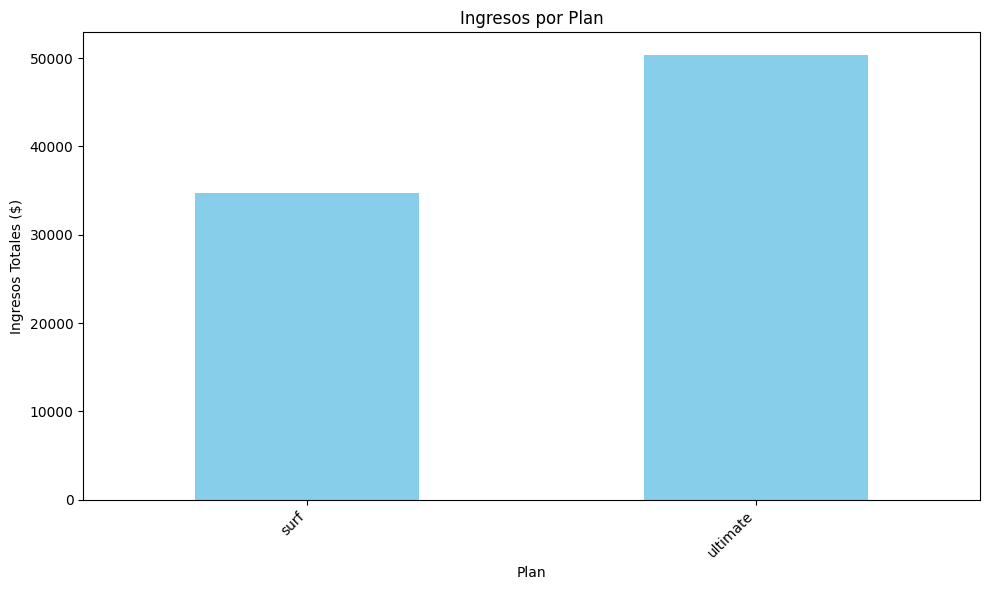

In [ ]:
plt.figure(figsize=(10, 6))
revenue_for_plan.plot(kind='bar', color='skyblue')

plt.title('Ingresos por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Totales ($)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
#Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.
income_surf= merged_data_with_tariff[merged_data_with_tariff['plan_name']== 'surf']['total_revenue']
income_ultimate= merged_data_with_tariff[merged_data_with_tariff['plan_name']== 'ultimate']['total_revenue']

t_stat, p_value= st.ttest_ind(income_surf,income_ultimate, equal_var= False)
alpha= 0.05

print('Estadisticos de prueba t:', t_stat)
print('Valor p:', p_value)

if p_value< alpha:
    print('Se rechaza la hipotesis nula: los ingresos promedio son diferentes entre los planes ultimate y surf')
else: 
    print('No se puede rechazar la hipotesis nula')


Estadisticos de prueba t: -479.0969004183894
Valor p: 0.0
Se rechaza la hipotesis nula: los ingresos promedio son diferentes entre los planes ultimate y surf


In [ ]:
income_surf= merged_data_with_tariff[merged_data_with_tariff['plan_name']== 'surf']['total_revenue']
income_ultimate= merged_data_with_tariff[merged_data_with_tariff['plan_name']== 'ultimate']['total_revenue']

t_stat, p_value= st.ttest_ind(income_surf,income_ultimate, equal_var= False)
alpha= 0.05

print('Estadisticos de prueba t:', t_stat)
print('Valor p:', p_value)

if p_value< alpha:
    print('Se rechaza la hipotesis nula: los ingresos promedio son diferentes entre los planes ultimate y surf')
else: 
    print('No se puede rechazar la hipotesis nula')

Estadisticos de prueba t: -7.952094891333888
Valor p: 3.1703905481135738e-15
Se rechaza la hipotesis nula: los ingresos promedio son diferentes entre los planes ultimate y surf


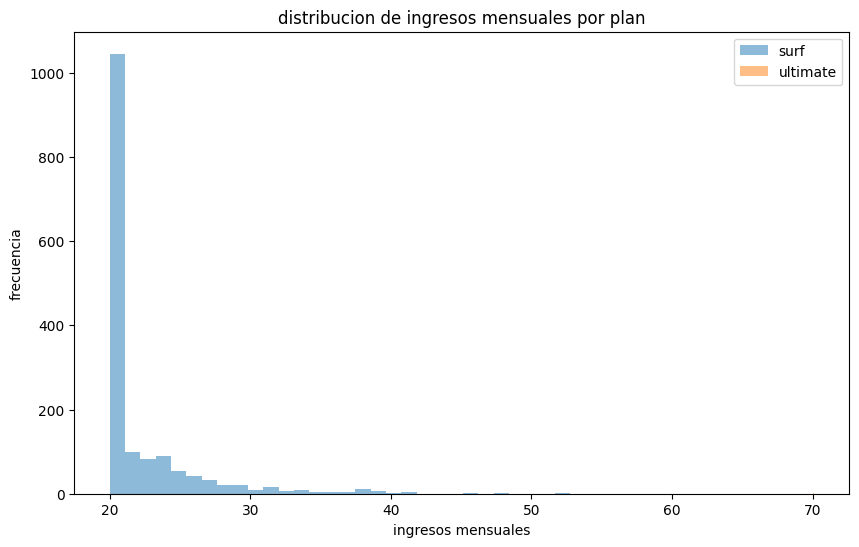

In [ ]:
bins=30
plt.figure(figsize=(10,6))
plt.hist(income_surf, bins=bins, alpha=0.5, label='surf')
plt.hist(income_ultimate, bins=bins, alpha=0.5, label='ultimate')

plt.xlabel('ingresos mensuales')
plt.ylabel('frecuencia')
plt.title('distribucion de ingresos mensuales por plan')
plt.legend()
plt.show()

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
#[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]
merged_data_with_tariff2 = pd.merge(merged_data_with_tariff, df_users[['user_id', 'city']], on='user_id', how='left')

income_ny_nj= merged_data_with_tariff2[merged_data_with_tariff2['city'].str.contains('NY-NJ')]['total_revenue']
income_other_regions= merged_data_with_tariff2[~merged_data_with_tariff2['city'].str.contains('NY-NJ')]['total_revenue']

t_stat, p_value= st.ttest_ind(income_ny_nj, income_other_regions, equal_var= False)
print('Estadistico de prueba t:', t_stat)
print('Valor p:', p_value)

if p_value< alpha:
    print('Se rechaza la hipotesis nula: los ingresos promedio son diferentes entre los usuarios de NY - NJ y otras regiones')
else:
    print('No se puede rechazar la hipotesis nula: no hay suficiente evidencia para concluir que los ingresos promedios son diferentes')
    
 

Estadistico de prueba t: -2.1309454999502133
Valor p: 0.0335256158853001
Se rechaza la hipotesis nula: los ingresos promedio son diferentes entre los usuarios de NY - NJ y otras regiones
